In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#Import csv file 
mdf=pd.read_csv('/Users/robertpatton/Desktop/D212/medical_clean.csv')

In [3]:
#Get data info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#Examine any missing values 
mdf.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [5]:
#Examine any duplicate values
mdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

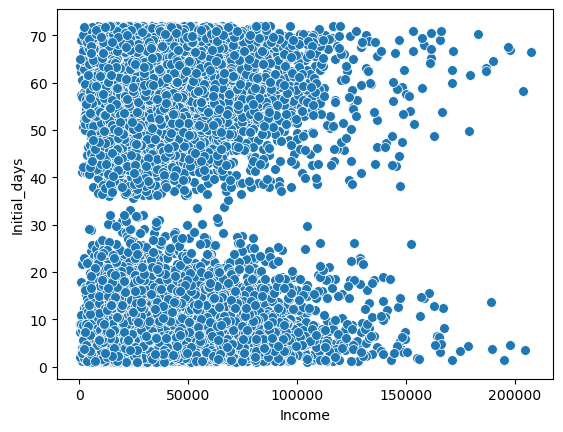

In [6]:
#Visualize data in scatterplot
ax=sns.scatterplot(data=mdf, x='Income', y='Initial_days', s=50)

In [7]:
#Look at statistics before cluster modeling
clustermodel=mdf[['Income', 'Initial_days']].describe().round(2)
clustermodel

,Income,Initial_days
count,10000.00,10000.00
mean,40490.50,34.46
std,28521.15,26.31
min,154.08,1.00
25%,19598.78,7.90
50%,33768.42,35.84
75%,54296.40,61.16
max,207249.10,71.98


In [8]:
#Normalize the data with z-score and standardscaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(mdf[['Income', 'Initial_days']])
scaled_data= pd.DataFrame(scaled_data, columns=['Income', 'Initial_days'])
scaled_data

,Income,Initial_days
0,1.615914,-0.907310
1,0.221443,-0.734595
2,-0.915870,-1.128292
3,-0.026263,-1.244503
4,-1.377325,-1.261991
...,...,...
9995,0.192047,0.650217
9996,-0.894380,1.300475
9997,0.891569,1.356958
9998,-0.378271,1.098585


In [9]:
#Review statistics on scaled data
scaled_data.describe().round(2)

,Income,Initial_days
count,10000.00,10000.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.41,-1.27
25%,-0.73,-1.01
50%,-0.24,0.05
75%,0.48,1.02
max,5.85,1.43


In [10]:
#Create KMeans object and fit it on the scaled data
k_model=KMeans(n_clusters=2, n_init=25, random_state=300)
k_model.fit(scaled_data)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [11]:
#Evaluate the kmodel
evaluate= pd.Series(k_model.labels_).value_counts()
evaluate

1    5002
0    4998
dtype: int64

In [12]:
#Create and visualize centroids
centroid=pd.DataFrame(k_model.cluster_centers_, columns= ['Income', 'Initial_days'])
centroid

,Income,Initial_days
0,0.008684,-0.959325
1,-0.008678,0.958557


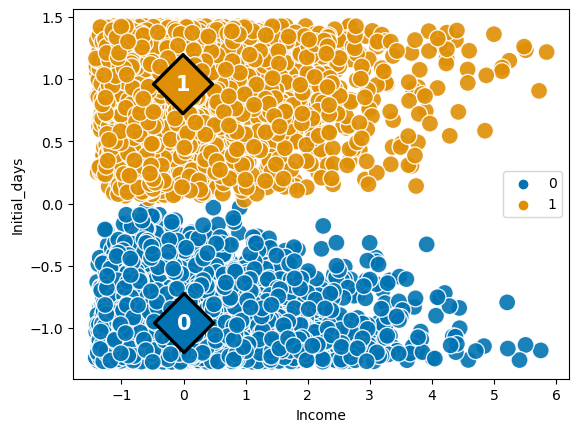

In [13]:
#Scatterplot with centroids
ax=sns.scatterplot(data=scaled_data,
                   x='Income',
                   y= 'Initial_days',
                   hue=k_model.labels_,
                   palette= 'colorblind',
                   alpha=0.9,
                   s=150,
                   legend=True)

ax=sns.scatterplot(data=centroid,
                   x='Income',
                   y= 'Initial_days',
                   hue=centroid.index,
                   palette='colorblind',
                   s=900,
                   marker='D',
                   ec='black',
                   legend=False)

for i in range(len(centroid)):
                plt.text(x=centroid.Income[i],
                         y=centroid.Initial_days[i],
                         s=i,
                         horizontalalignment='center',
                         verticalalignment='center',
                         size=15,
                         weight='bold',
                         color='white')

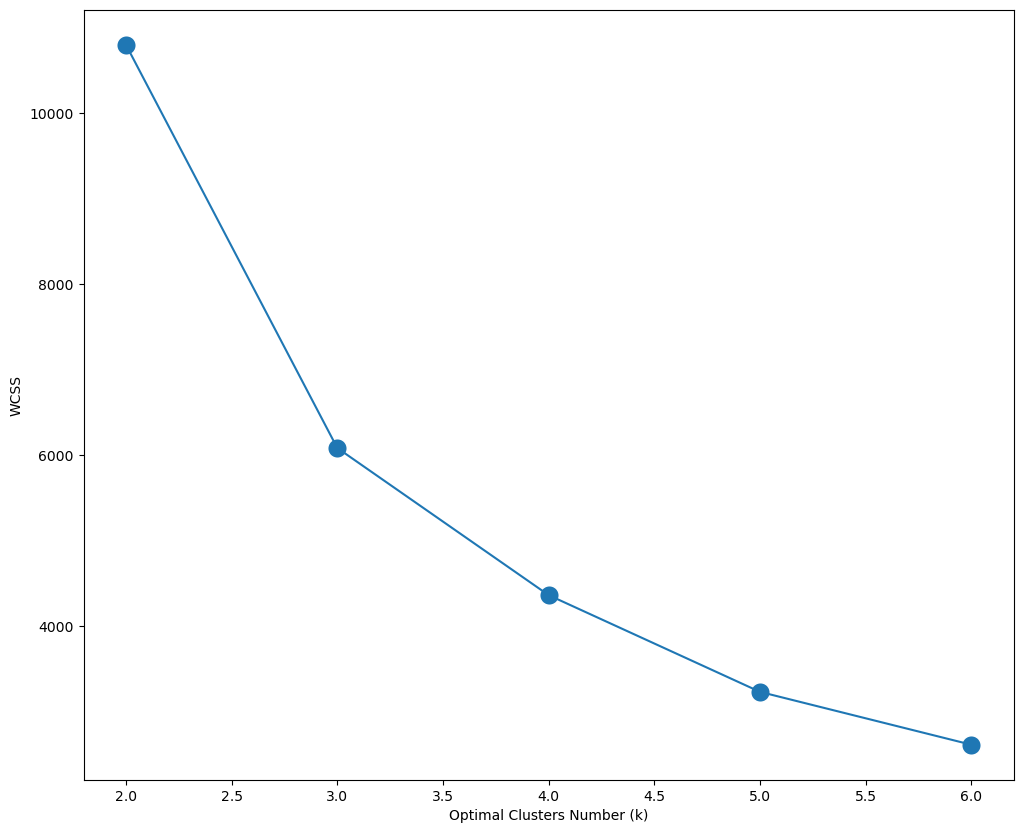

In [14]:
#Determine ideal number of clusters using elbow plot
wcss=[]
for k in range(2, 7):
    model=KMeans(n_clusters=k, n_init=50, random_state=300)
    model.fit(scaled_data)
    wcss.append(model.inertia_)
wcss_s=pd.Series(wcss, index=range(2, 7))

plt.figure(figsize=(12, 10))
ax=sns.lineplot(y=wcss_s, x=wcss_s.index)
ax=sns.scatterplot(y=wcss_s, x=wcss_s.index, s=200)
ax=ax.set(xlabel='Optimal Clusters Number (k)',
          ylabel= 'WCSS')

In [15]:
#Get silhouette score to reconfirm ideal number of clusters for model
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaled_data, k_model.labels_)
sil_score

0.5015402316355737

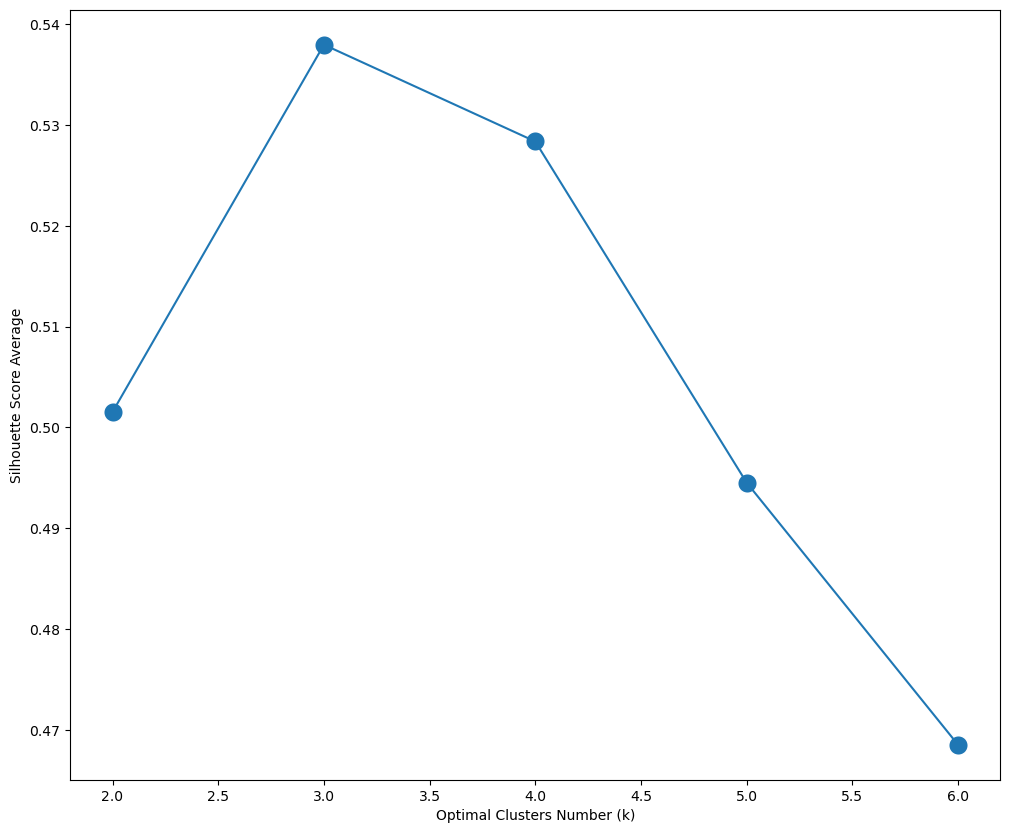

In [16]:
#Plot silhouette score
silhoutte=[]
for k in range(2, 7):
    model=KMeans(n_clusters=k, n_init=25, random_state=300)
    model.fit(scaled_data)
    silhoutte.append(silhouette_score(scaled_data, model.labels_))
    
sil_s=pd.Series(silhoutte, index= range(2, 7))
    
plt.figure(figsize=(12,10))
ax=sns.lineplot(y=sil_s, x=sil_s.index)
ax=sns.scatterplot(y=sil_s, x=sil_s.index, s=200)
ax=ax.set(xlabel='Optimal Clusters Number (k)',
          ylabel= 'Silhouette Score Average')

In [17]:
#Create final model based on elbow and silhouette plots
final_model= KMeans(n_clusters= 3, n_init=25, random_state=300)
final_model.fit(scaled_data)

KMeans(n_clusters=3, n_init=25, random_state=300)

In [18]:
#Evaluate the final model
eval_fin= pd.Series(final_model.labels_).value_counts()
eval_fin

1    4304
0    4196
2    1500
dtype: int64

In [19]:
#Create centroids for final model plot
centroid=pd.DataFrame(final_model.cluster_centers_, columns= ['Income', 'Initial_days'])
centroid

,Income,Initial_days
0,-0.335609,-0.963948
1,-0.312614,0.971519
2,1.834342,-0.092999


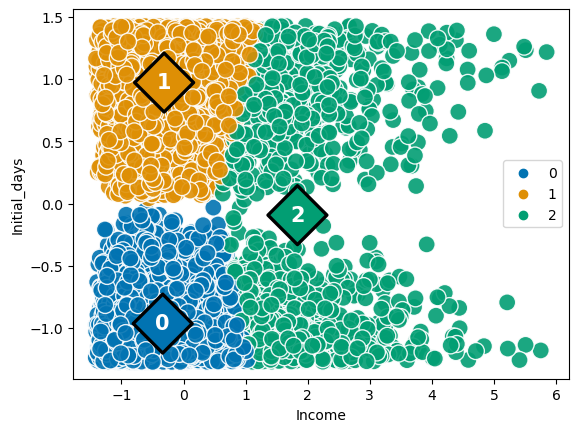

In [20]:
#Create scatter plot of final model with 3 clusters instead of two
ax=sns.scatterplot(data=scaled_data,
                   x='Income',
                   y= 'Initial_days',
                   hue=final_model.labels_,
                   palette= 'colorblind',
                   alpha=0.9,
                   s=150,
                   legend=True)

ax=sns.scatterplot(data=centroid,
                   x='Income',
                   y= 'Initial_days',
                   hue=centroid.index,
                   palette='colorblind',
                   s=900,
                   marker='D',
                   ec='black',
                   legend=False)

for i in range(len(centroid)):
                plt.text(x=centroid.Income[i],
                         y=centroid.Initial_days[i],
                         s=i,
                         horizontalalignment='center',
                         verticalalignment='center',
                         size=15,
                         weight='bold',
                         color='white')

In [21]:
#Export scaled data to csv
scaled_data.to_csv('/Users/robertpatton/Desktop/D212_Cluster.csv')